In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array , load_img
from random import shuffle
import tensorflow as tf 
img_file = "C:/Users/ASUS/dog_breed_classification/dog_breed_train/"
TEST_DIR = "C:/Users/ASUS/dog_breed_classification/dog_breed_test/"

In [2]:
df = pd.read_csv('labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
df1 = df.assign(img_path=lambda x: img_file + x['id'] +'.jpg')
df1

,id,breed,img_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,C:/Users/ASUS/dog_breed_classification/dog_bre...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,C:/Users/ASUS/dog_breed_classification/dog_bre...
2,001cdf01b096e06d78e9e5112d419397,pekinese,C:/Users/ASUS/dog_breed_classification/dog_bre...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,C:/Users/ASUS/dog_breed_classification/dog_bre...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,C:/Users/ASUS/dog_breed_classification/dog_bre...
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier,C:/Users/ASUS/dog_breed_classification/dog_bre...
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier,C:/Users/ASUS/dog_breed_classification/dog_bre...
7,002a283a315af96eaea0e28e7163b21b,borzoi,C:/Users/ASUS/dog_breed_classification/dog_bre...
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,C:/Users/ASUS/dog_breed_classification/dog_bre...
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,C:/Users/ASUS/dog_breed_classification/dog_bre...


In [4]:
df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,35e495b1de348a81e9c64f929de8beff,scottish_deerhound
freq,1,126


In [5]:
bf = df.breed.value_counts()
bf = pd.DataFrame(bf)
bf

,breed
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110
samoyed,109


In [6]:
top_20=list(df.breed.value_counts()[0:20].index)
top_20

['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'great_pyrenees',
 'pomeranian',
 'basenji',
 'samoyed',
 'tibetan_terrier',
 'airedale',
 'cairn',
 'leonberg',
 'japanese_spaniel',
 'beagle',
 'miniature_pinscher',
 'blenheim_spaniel',
 'australian_terrier',
 'irish_wolfhound']

In [7]:
t20 = df1[df1['breed'].isin(top_20)]
t20.head()

,id,breed,img_path
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,C:/Users/ASUS/dog_breed_classification/dog_bre...
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,C:/Users/ASUS/dog_breed_classification/dog_bre...
12,00693b8bc2470375cc744a6391d397ec,maltese_dog,C:/Users/ASUS/dog_breed_classification/dog_bre...
29,00bee065dcec471f26394855c5c2f3de,cairn,C:/Users/ASUS/dog_breed_classification/dog_bre...
48,013f8fdf6d638c7bb042f5f17e8a9fdc,tibetan_terrier,C:/Users/ASUS/dog_breed_classification/dog_bre...


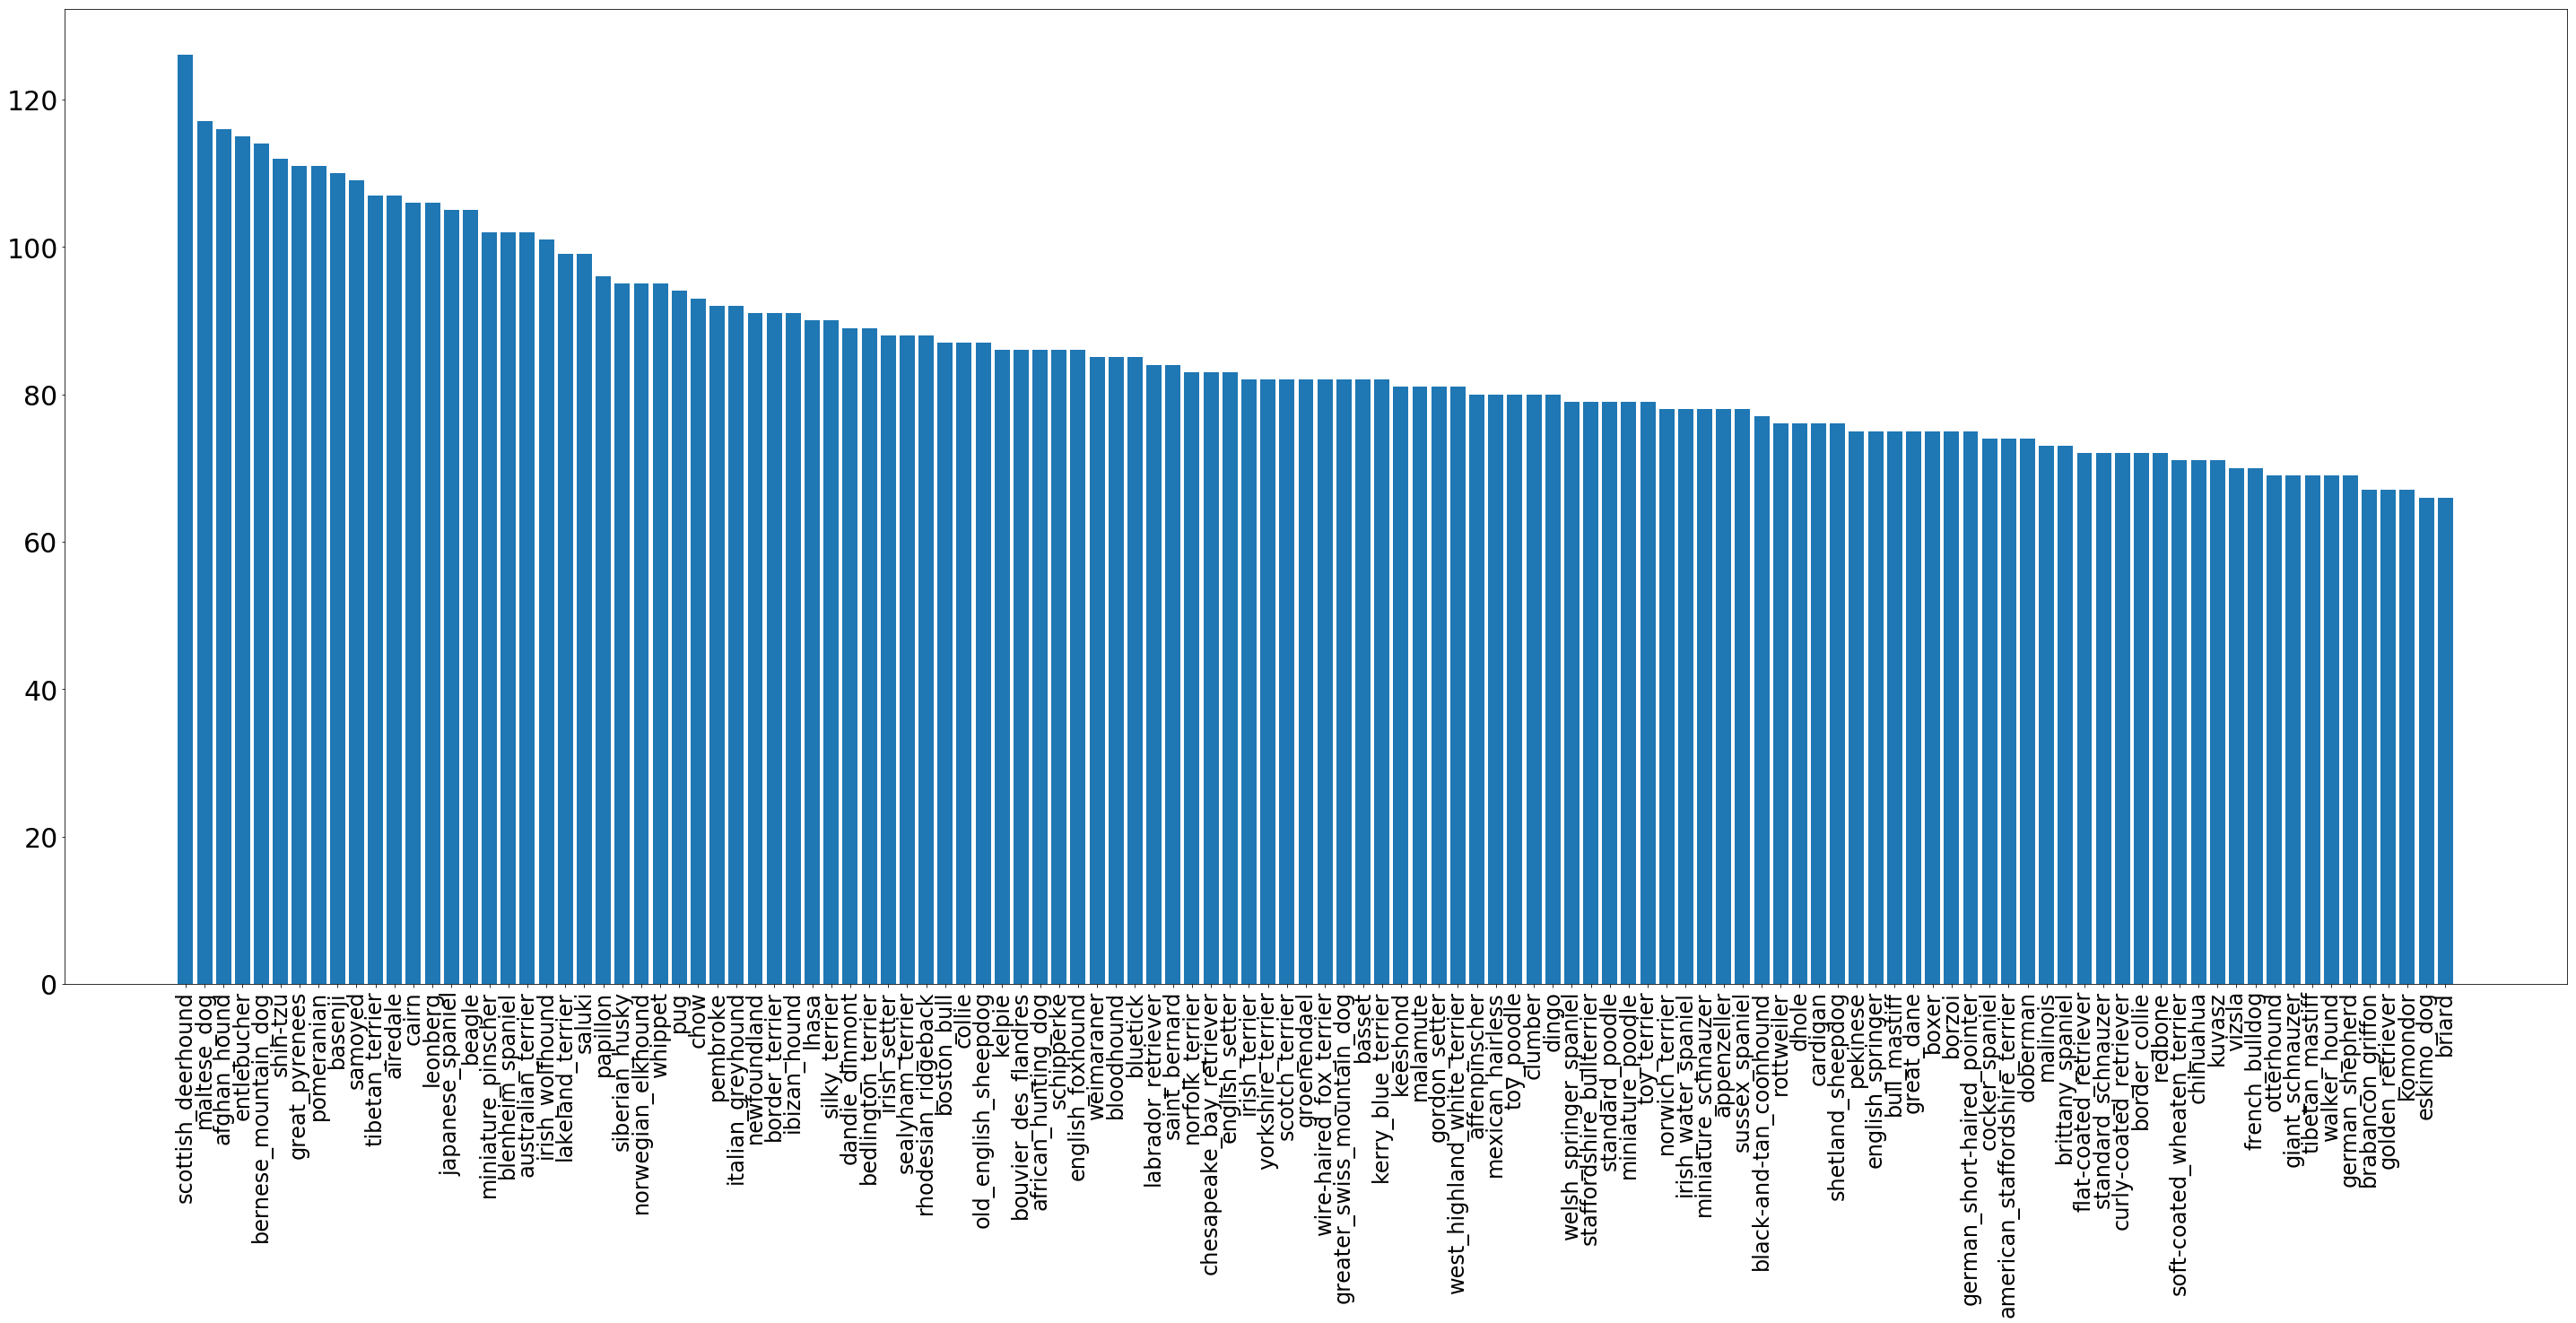

In [8]:
%matplotlib inline
plt.figure(figsize=(50 , 20))
plt.bar( bf.index , bf['breed'])
plt.xticks(rotation=90 ,fontsize = 24)
plt.yticks(fontsize = 30)
plt.show()

In [9]:
img_label=t20.breed
img_label=pd.get_dummies(t20.breed)
img_label.head()


,afghan_hound,airedale,australian_terrier,basenji,beagle,bernese_mountain_dog,blenheim_spaniel,cairn,entlebucher,great_pyrenees,irish_wolfhound,japanese_spaniel,leonberg,maltese_dog,miniature_pinscher,pomeranian,samoyed,scottish_deerhound,shih-tzu,tibetan_terrier
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
img_pixel=np.array([img_to_array(load_img(img, target_size=(150, 150))) for img in tqdm(t20['img_path'].values.tolist())])
img_pixel.shape

100%|██████████| 2184/2184 [00:47<00:00, 45.54it/s]


(2184, 150, 150, 3)

In [11]:
X=img_pixel
y=img_label.values
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2184, 150, 150, 3)
(2184, 20)
(1747, 150, 150, 3)
(1747, 20)
(437, 150, 150, 3)
(437, 20)


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
'''train_generator = train_datagen.flow_from_directory(X_train, Y = y_train,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))'''
training_set=train_datagen.flow(X_train,y=y_train,batch_size=100)

validation_datagen = ImageDataGenerator(rescale = 1./255)
'''validation_generator = validation_datagen.flow_from_directory(
    X_test, y= y_test,
    target_size=(150,150),
    class_mode='categorical'
)'''
testing_set=validation_datagen.flow(X_test,y=y_test,batch_size=100)

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = myCallback()
history = model.fit(training_set, epochs=25, validation_data = testing_set, verbose = 1 )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

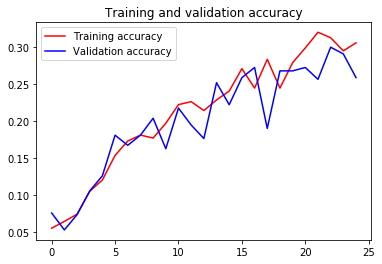

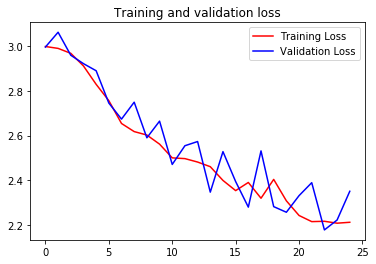

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()